In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
sns.set()

In [2]:
df_midwest = pd.read_csv('Datasets/midwest.csv')

In [3]:
df_midwest.shape

(437, 29)

In [4]:
df_midwest.head()

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,1,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,2,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,3,563,BOND,IL,0.022,14991,681.409091,14477,429,35,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,4,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,5,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [5]:
il_20 = df_midwest[(df_midwest['state'] == 'IL')]
il_20 = il_20[['county', 'percollege']]

In [6]:
il_20

,county,percollege
0,ADAMS,19.631392
1,ALEXANDER,11.243308
2,BOND,17.033819
3,BOONE,17.278954
4,BROWN,14.475999
...,...,...
97,WHITESIDE,16.553050
98,WILL,24.756861
99,WILLIAMSON,21.059562
100,Winnebago,22.652364


In [10]:
il_20 = il_20.sort_values(by=['percollege'], ascending = False)[:20]
il_20 = il_20.sort_values(by=['percollege'])

In [18]:
il_20

,county,percollege
79,RICHLAND,21.507740
73,PIATT,22.011857
100,Winnebago,22.652364
101,WOODFORD,22.805218
92,WABASH,24.730047
98,WILL,24.756861
46,KENDALL,24.889348
14,COLES,25.175041
71,PEORIA,25.838414
44,KANE,27.593883


In [22]:
m_categories = list(il_20['county'])
il_20['county'] = pd.Categorical(il_20['county'], categories=m_categories, ordered = True)

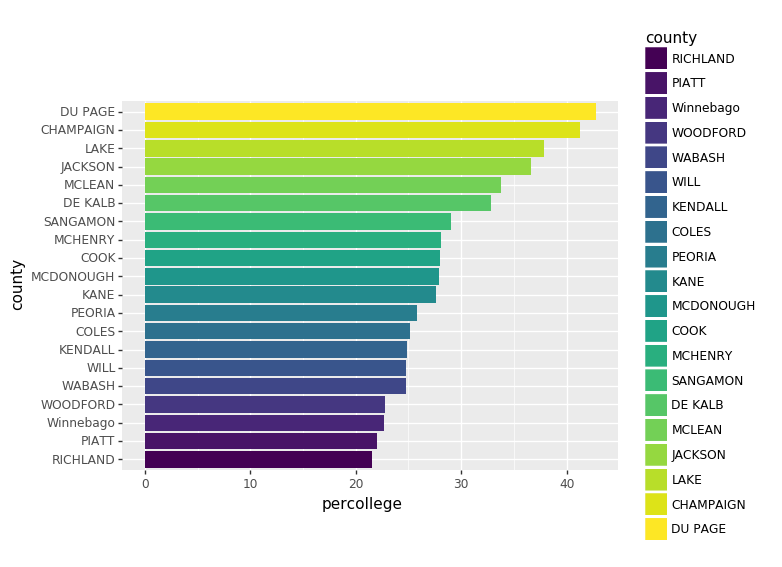

<ggplot: (7017760813)>


In [23]:
plt_top20 = ggplot(il_20, aes(x = 'county', y = 'percollege', fill = 'county')) +\
geom_bar(stat = "identity") +\
coord_flip()
print(plt_top20)

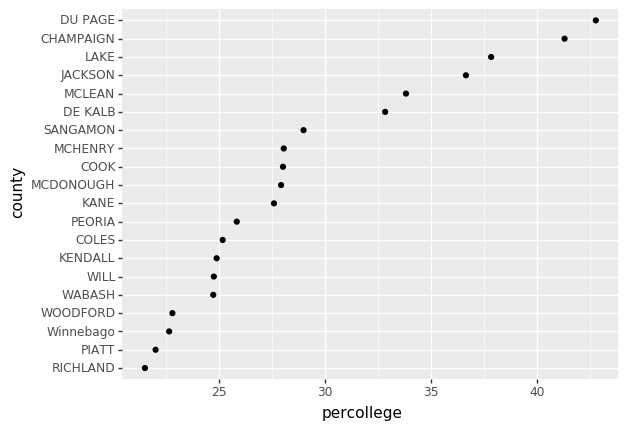

<ggplot: (7017482633)>


In [25]:
plt2 = ggplot(il_20, aes(x = 'percollege', y = 'county')) + geom_point() 
print(plt2)

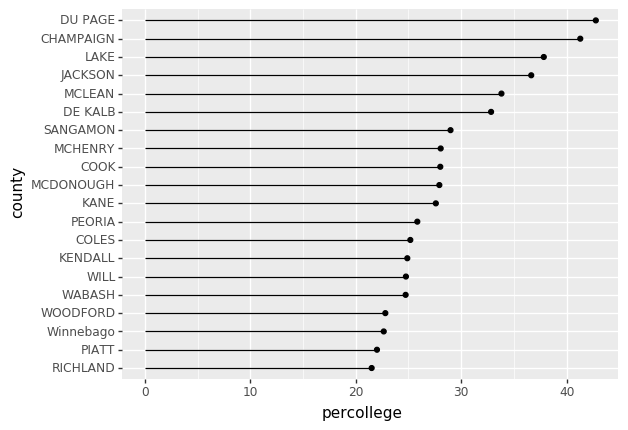

<ggplot: (7018382201)>


In [32]:
plt3 = ggplot(il_20, aes(x = 'percollege', y = 'county'))  +\
    geom_segment(aes(x = 0, y = 'county', xend = 'percollege', yend = 'county'))  +\
    geom_point()
print(plt3)